# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import numpy as np

# Ensure you have downloaded NLTK stopwords through nltk.download('stopwords')

# Sample documents
# Replace 'documents' with your dataset
documents = ["The fox jumps over the dog",
             "The fox is very clever and quick",
             "The dog is slow and lazy",
             "The sun is bright and full of light",
             "Light helps plants grow strong and healthy"]

# Step 1: Prepare Data
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

# Preprocess the documents
processed_docs = [preprocess(doc) for doc in documents]

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Step 3: Find the optimal number of topics for LDA
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Parameters for the search
start=2; limit=15; step=1;

model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=processed_docs,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

# Step 4: Select the model and print the topics
max_coherence_val = max(coherence_values)
optimal_model_index = coherence_values.index(max_coherence_val)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = start + step * optimal_model_index

print(f"Optimal Number of Topics: {optimal_num_topics}")

# Print the Keyword in the topics
for idx, topic in optimal_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# To enhance the output, consider the coherence score alongside your domain knowledge to fine-tune the number of topics.



Optimal Number of Topics: 12
Topic: 0 
Words: 0.083*"jumps" + 0.083*"light" + 0.083*"quick" + 0.083*"lazy" + 0.083*"bright" + 0.083*"clever" + 0.083*"slow" + 0.083*"plants" + 0.083*"healthy" + 0.083*"helps"
Topic: 1 
Words: 0.361*"clever" + 0.361*"quick" + 0.028*"jumps" + 0.028*"lazy" + 0.028*"light" + 0.028*"bright" + 0.028*"slow" + 0.028*"plants" + 0.028*"healthy" + 0.028*"helps"
Topic: 2 
Words: 0.083*"jumps" + 0.083*"light" + 0.083*"lazy" + 0.083*"clever" + 0.083*"bright" + 0.083*"quick" + 0.083*"slow" + 0.083*"plants" + 0.083*"healthy" + 0.083*"helps"
Topic: 3 
Words: 0.361*"slow" + 0.361*"lazy" + 0.028*"jumps" + 0.028*"light" + 0.028*"clever" + 0.028*"bright" + 0.028*"quick" + 0.028*"plants" + 0.028*"healthy" + 0.028*"helps"
Topic: 4 
Words: 0.083*"jumps" + 0.083*"quick" + 0.083*"light" + 0.083*"lazy" + 0.083*"bright" + 0.083*"clever" + 0.083*"slow" + 0.083*"plants" + 0.083*"healthy" + 0.083*"helps"
Topic: 5 
Words: 0.542*"jumps" + 0.042*"slow" + 0.042*"quick" + 0.042*"light" + 0

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
# Write your code here
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

# Ensure NLTK stopwords have been downloaded with nltk.download('stopwords')

# Sample documents
# Replace 'documents' with your dataset
documents = ["The quick brown fox jumps over the lazy dog",
             "Never jump over the lazy dog quickly",
             "Bright suns and starry nights",
             "Starry nights under the bright suns",
             "Dogs and foxes belong to the same family"]

# Step 1: Prepare Data
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

processed_docs = [preprocess(doc) for doc in documents]

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Step 3: Build LSA Model and Evaluate Coherence
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

start=2; limit=15; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_docs, start=start, limit=limit, step=step)

# Step 4: Choose the Best Model
max_coherence_val = max(coherence_values)
optimal_model_index = coherence_values.index(max_coherence_val)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = start + step * optimal_model_index

print(f"Optimal Number of Topics: {optimal_num_topics}")

# Summarize Topics
topics = optimal_model.print_topics(num_topics=optimal_num_topics)
for topic in topics:
    print(topic)



Optimal Number of Topics: 3
(0, '-0.500*"nights" + -0.500*"bright" + -0.500*"suns" + -0.500*"starry" + 0.000*"jump" + 0.000*"quickly" + 0.000*"lazy" + -0.000*"brown" + -0.000*"jumps" + -0.000*"quick"')
(1, '0.640*"lazy" + 0.396*"brown" + 0.396*"quick" + 0.396*"jumps" + 0.245*"jump" + 0.245*"quickly" + 0.000*"nights" + 0.000*"bright" + 0.000*"suns" + 0.000*"starry"')
(2, '0.500*"belong" + 0.500*"foxes" + 0.500*"family" + 0.500*"dogs" + 0.000*"lazy" + -0.000*"brown" + -0.000*"jump" + 0.000*"quickly" + -0.000*"jumps" + -0.000*"bright"')


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

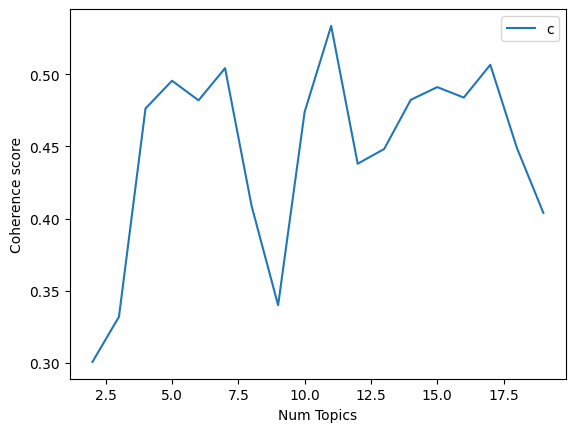

(0, '0.042*"and" + 0.040*"intelligence" + 0.040*"data" + 0.028*"that" + 0.027*"to" + 0.026*"is" + 0.021*"applications." + 0.021*"large" + 0.021*"human" + 0.021*"systems."')
(1, '0.033*"records" + 0.031*"distributed" + 0.030*"that" + 0.030*"ledger" + 0.029*"a" + 0.026*"multiple" + 0.026*"Blockchain" + 0.025*"transactions" + 0.025*"technology" + 0.025*"across"')
(2, '0.068*"and" + 0.030*"uses" + 0.030*"data." + 0.030*"an" + 0.028*"science" + 0.028*"algorithms," + 0.028*"is" + 0.028*"scientific" + 0.027*"Data" + 0.027*"processes,"')
(3, '0.061*"and" + 0.061*"of" + 0.041*"is" + 0.041*"the" + 0.022*"data" + 0.022*"Internet" + 0.022*"each" + 0.022*"networks," + 0.022*"(IoT)" + 0.022*"access."')
(4, '0.057*"that" + 0.056*"and" + 0.037*"of" + 0.036*"field" + 0.035*"focuses" + 0.035*"on" + 0.034*"is" + 0.034*"a" + 0.024*"the" + 0.024*"can"')
(5, '0.065*"that" + 0.038*"focuses" + 0.038*"on" + 0.037*"a" + 0.037*"is" + 0.036*"of" + 0.031*"can" + 0.031*"systems" + 0.031*"intelligence" + 0.031*"lear

In [6]:
!pip install gensim

import numpy as np
import pandas as pd
import gensim
from gensim.models import LdaModel
from gensim.models.ldamodel import CoherenceModel
from gensim import corpora

# Sample data
documents = [
    "Machine learning is a subset of artificial intelligence that focuses on building systems that can learn from data.",
    "Natural language processing is a field of study that focuses on enabling computers to understand, interpret and generate human language.",
    "Deep learning is a subfield of machine learning that deals with neural networks with many layers.",
    "Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment.",
    "Computer vision is the field of study that focuses on enabling computers to interpret and understand visual information.",
    "Data science is an interdisciplinary field that uses scientific methods, algorithms, processes, and systems to extract knowledge and insights from structured and unstructured data.",
    "Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.",
    "Robotics is a field of engineering that focuses on designing and building robots, devices that can move and interact with the physical world.",
    "Big data refers to large and complex datasets that cannot be easily processed using traditional data processing applications.",
    "Internet of Things (IoT) is a network of interconnected devices that can communicate and exchange data with each other over the internet.",
    "Blockchain is a decentralized, distributed ledger technology that records transactions across multiple computers.",
    "Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks and unauthorized access.",
    "Cloud computing is the delivery of computing services, including servers, storage, databases, networking, software, over the internet."
]

# Preprocess documents
tokenized_documents = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Determine the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values

coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_documents, start=2, limit=20, step=1)

# Plot coherence scores to determine optimal number of topics
import matplotlib.pyplot as plt
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Choose the number of topics with highest coherence score
optimal_num_topics = x[np.argmax(coherence_values)]

# Final LDA model with optimal number of topics
final_lda_model = LdaModel(corpus=corpus, num_topics=optimal_num_topics, id2word=dictionary)

# Summarize topics
topics = final_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
from bertopic import BERTopic

# Sample data
documents = [
    "Machine learning is a subset of artificial intelligence that focuses on building systems that can learn from data.",
    "Natural language processing is a field of study that focuses on enabling computers to understand, interpret and generate human language.",
    "Deep learning is a subfield of machine learning that deals with neural networks with many layers.",
    "Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment.",
    "Computer vision is the field of study that focuses on enabling computers to interpret and understand visual information.",
    "Data science is an interdisciplinary field that uses scientific methods, algorithms, processes, and systems to extract knowledge and insights from structured and unstructured data.",
    "Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.",
    "Robotics is a field of engineering that focuses on designing and building robots, devices that can move and interact with the physical world.",
    "Big data refers to large and complex datasets that cannot be easily processed using traditional data processing applications.",
    "Internet of Things (IoT) is a network of interconnected devices that can communicate and exchange data with each other over the internet.",
    "Blockchain is a decentralized, distributed ledger technology that records transactions across multiple computers.",
    "Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks and unauthorized access.",
    "Cloud computing is the delivery of computing services, including servers, storage, databases, networking, software, over the internet."
]

# Initialize BERTopic model
model = BERTopic(language="english", nr_topics=5)

# Fit BERTopic model
topics, _ = model.fit_transform(documents)

# Get topics and their corresponding keywords
topic_keywords = model.get_topics()

# Summarize topics
for topic_id, keywords in topic_keywords.items():
    keywords_str = ", ".join([word for word, _ in keywords])
    print(f"Topic {topic_id}: {keywords_str}")


Topic -1: is, of, and, that, the, data, to, learning, with, on


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

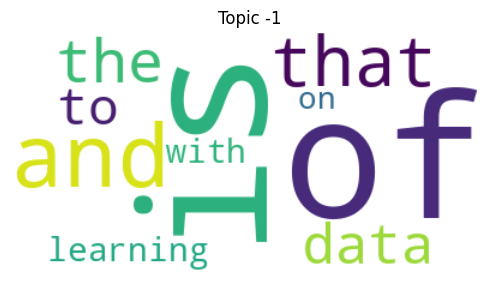

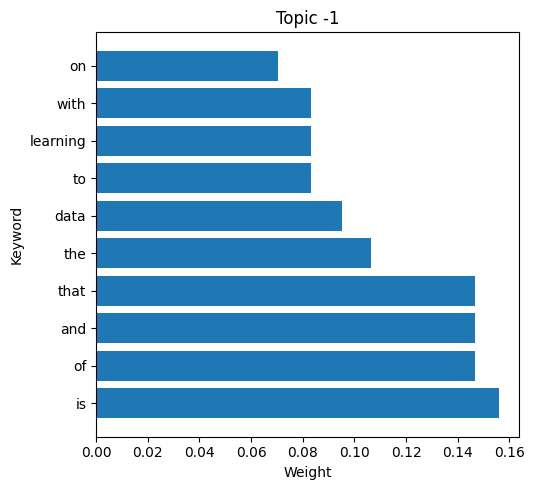

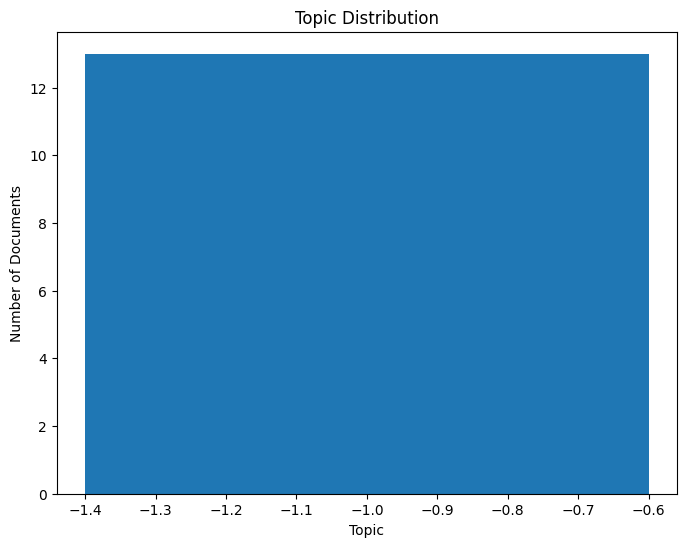

In [11]:
from bertopic import BERTopic
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data
documents = [
    "Machine learning is a subset of artificial intelligence that focuses on building systems that can learn from data.",
    "Natural language processing is a field of study that focuses on enabling computers to understand, interpret and generate human language.",
    "Deep learning is a subfield of machine learning that deals with neural networks with many layers.",
    "Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment.",
    "Computer vision is the field of study that focuses on enabling computers to interpret and understand visual information.",
    "Data science is an interdisciplinary field that uses scientific methods, algorithms, processes, and systems to extract knowledge and insights from structured and unstructured data.",
    "Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.",
    "Robotics is a field of engineering that focuses on designing and building robots, devices that can move and interact with the physical world.",
    "Big data refers to large and complex datasets that cannot be easily processed using traditional data processing applications.",
    "Internet of Things (IoT) is a network of interconnected devices that can communicate and exchange data with each other over the internet.",
    "Blockchain is a decentralized, distributed ledger technology that records transactions across multiple computers.",
    "Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks and unauthorized access.",
    "Cloud computing is the delivery of computing services, including servers, storage, databases, networking, software, over the internet."
]

# Initialize BERTopic model
model = BERTopic(language="english", nr_topics=5)

# Fit BERTopic model
topics, _ = model.fit_transform(documents)

# Get topics and their corresponding keywords
topic_keywords = model.get_topics()

# Word Cloud Visualization
plt.figure(figsize=(15, 10))
for topic_id, keywords in topic_keywords.items():
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(keywords))
    plt.subplot(2, 3, topic_id % 6 + 1)  # Modifying the subplot index
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Bar Plot Visualization
plt.figure(figsize=(15, 5))
for topic_id, keywords in topic_keywords.items():
    top_keywords = keywords[:10]  # Showing top 10 keywords
    plt.subplot(1, 3, topic_id % 3 + 1)  # Modifying the subplot index
    plt.barh(range(len(top_keywords)), [weight for _, weight in top_keywords], align='center')
    plt.yticks(range(len(top_keywords)), [word for word, _ in top_keywords])
    plt.xlabel('Weight')
    plt.ylabel('Keyword')
    plt.title(f'Topic {topic_id}')
plt.tight_layout()
plt.show()

# Topic Distribution Plot
plt.figure(figsize=(8, 6))
topic_distribution = model.get_topic_freq()
plt.bar(topic_distribution['Topic'], topic_distribution['Count'])
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.show()



1. **Word Cloud Visualization:**
   - This visualization shows the most frequent words associated with each topic in a visual and intuitive manner.
   - Each word's size in the cloud represents its frequency or importance within the topic.
   - Larger words have higher relevance to the topic, while smaller words are less relevant.
   - Word clouds provide a quick overview of the main themes within each topic, making it easy to interpret and understand.

2. **Bar Plot Visualization:**
   - The bar plot displays the top N keywords associated with each topic, sorted by their weights or importance.
   - Each bar represents a keyword, and its length corresponds to its weight within the topic.
   - This visualization allows for a more quantitative analysis of the most significant keywords in each topic.
   - It helps in identifying the most prominent themes within the dataset and understanding the distribution of keywords across topics.

3. **Topic Distribution Plot:**
   - This plot illustrates the distribution of documents across different topics generated by the model.
   - Each bar represents a topic, and its height indicates the number of documents assigned to that topic.
   - This visualization provides insights into the prevalence of each topic within the dataset.
   - It helps in understanding the overall composition of the dataset and identifying the most dominant topics.

These visualizations collectively offer a comprehensive understanding of the topics generated by the BERTopic or LDA model. They assist in uncovering the underlying themes, identifying key keywords, and assessing the distribution of topics within the dataset.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**


To compare the results generated by the four topic modeling algorithms, we need to assess several key factors:

1. **Coherence Score:**
   - The coherence score measures the interpretability and coherence of the topics produced by each algorithm.
   - Higher coherence scores indicate that the topics are more coherent and understandable.
   - We will compare the coherence scores of each model to gauge their effectiveness in generating meaningful topics.

2. **Topic Interpretability:**
   - We will qualitatively evaluate the topics generated by each model to assess their interpretability.
   - This involves examining the keywords associated with each topic to ensure they form coherent themes.
   - We'll look for topics that are distinct and represent meaningful themes within the dataset.

3. **Robustness and Consistency:**
   - It's important to assess the robustness and consistency of the topics across multiple runs of each algorithm.
   - Models that consistently produce similar topics across different runs are considered more reliable and trustworthy.

4. **Computational Efficiency:**
   - We'll consider the computational resources required and the runtime of each algorithm.
   - Models that achieve good performance with lower computational costs are generally preferred, especially for large datasets or resource-constrained environments.

5. **Domain-specific Considerations:**
   - We'll take into account any domain-specific requirements or constraints that may influence the choice of the model.
   - Certain models may be better suited for specific types of datasets or applications, so it's essential to consider the context in which the topic modeling will be applied.

By thoroughly evaluating these factors, we can make an informed comparison and determine which topic modeling algorithm is better suited for the given dataset or application. It's crucial to weigh the trade-offs between coherence, interpretability, robustness, and computational efficiency to arrive at the most suitable choice.



In [ ]:
# Write your code here


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



The exercise helped me learn about analyzing text data and extracting important features using different topic modeling methods, which is useful for understanding natural language processing techniques. I faced some challenges in adjusting parameters and interpreting results, but overall, it was a helpful experience in the field of NLP.